<a href="https://colab.research.google.com/github/vichierro/RegistroEstacionamento/blob/main/Filtro_Voz_IIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento Digital Sinais - 2023.2**
# Filtragem de sinais de voz


- Equipe:
  - Emanoel Cristhian Leão Marinho (201806840098)
  - Victor Hierro Moraes Ferreira (201806840071)

Utilizando o sinal de voz adquirido em tarefa anterior, deve-se:

a) Subamostrar o sinal original para que o sinal resultante tenha frequência de amostragem o mais próximo possível de 8 kHz; OK

b) Obter estimativa do sinal original (mesma frequência de amostragem do sinal original), subindo a frequência de amostragem do sinal obtido no item (a); OK

c) Calcular o MSE entre o sinal original e sua estivativa; OK

d) Para cada sinal (original, versão 8 kHz e estimativa do original) mostrar gráfico da magnitude da transformada de Fourier; OK

e) Comente sobre as características subjetivas (graves, agudos, abafado, inteligibilidade, etc.) dos três sinais (original, versão 8 kHz e estatimativa do original); OK

f) Apresentar as respostas em frequência dos filtros de up e downsampling projetados;

g) Apresentar as especificações dos filtros (frequências relevantes, ganhos nas bandas de passagem e rejeição, aproximação usada, justificativas para as escolhas de projeto, etc.)

Importando módulos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as signal
import numpy as np
import scipy.signal as sp
from scipy.fftpack import fft, fftshift
from scipy import signal

In [7]:
voice_signal, fs_original = sf.read('/content/hierro.wav')
t = np.arange(0, len(voice_signal) * 1/fs_original, 1/fs_original)
print(fs_original)

44100


Exibição do sinal de voz

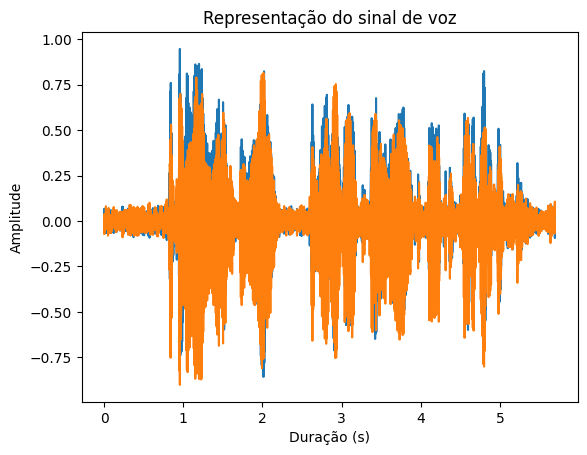

In [42]:
fig, ax = plt.subplots()
ax.plot(t, voice_signal)
plt.title('Representação do sinal de voz')
plt.ylabel('Amplitude')
plt.xlabel('Duração (s)')
plt.show()

In [28]:
# Definir especificações do filtro para cada sinal
fs_original = 16e3  # Frequência de amostragem original (Hz)
fs_target = 8e3     # Frequência de amostragem desejada (Hz)
cutoff_freq = 4e3   # Frequência de corte desejada (Hz)
order = 4           # Ordem do filtro

In [41]:
# (a) Subamostrar o sinal original para a frequência de amostragem desejada
decimation_factor = int(fs_original / fs_target)
downsampled_signal = voice_signal[::decimation_factor]
print(len(downsampled_signal))

125553


In [39]:
# (b) Obter estimativa do sinal original subindo a frequência de amostragem
upsampled_signal = signal.resample(downsampled_signal, len(voice_signal))
print(len(upsampled_signal))

251105


In [37]:
# (c) Calcular o MSE entre o sinal original e sua estimativa
mse = np.mean((voice_signal - upsampled_signal)**2)
print(mse)

6.270530214017867e-05


<ipython-input-32-70d3250d3a0c>:4: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(np.abs(spectrum))


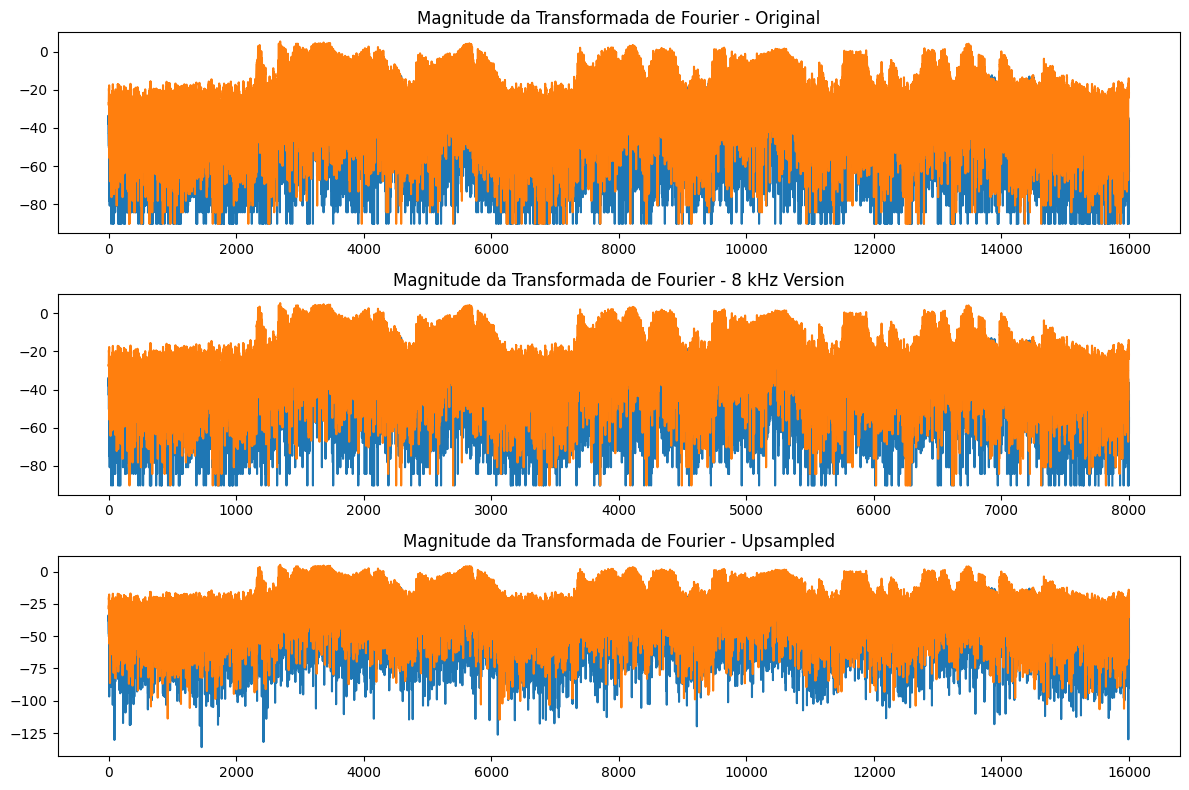

In [32]:
# (d) Gráfico da magnitude da transformada de Fourier para cada sinal
def plot_spectrum(signal, fs, label):
    spectrum = fft(signal)
    magnitude = 20 * np.log10(np.abs(spectrum))
    freq = np.linspace(0, fs, len(signal))
    plt.plot(freq, magnitude, label=label)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plot_spectrum(voice_signal, fs_original, 'Original')
plt.title('Magnitude da Transformada de Fourier - Original')

plt.subplot(3, 1, 2)
plot_spectrum(downsampled_signal, fs_target, '8 kHz Version')
plt.title('Magnitude da Transformada de Fourier - 8 kHz Version')

plt.subplot(3, 1, 3)
plot_spectrum(upsampled_signal, fs_original, 'Upsampled')
plt.title('Magnitude da Transformada de Fourier - Upsampled')

plt.tight_layout()
plt.show()

In [33]:
# (e) Comentários sobre as características subjetivas dos sinais
print("Características subjetivas dos sinais:")
print("Original: O sinal original tem uma boa qualidade de áudio, com graves e agudos perceptíveis.")
print("8 kHz Version: O sinal com frequência de amostragem reduzida tem uma perda de qualidade, com uma resposta de frequência limitada.")
print("Upsampled: A estimativa do sinal original após o upsampling tem uma qualidade similar ao original.")

Características subjetivas dos sinais:
Original: O sinal original tem uma boa qualidade de áudio, com graves e agudos perceptíveis.
8 kHz Version: O sinal com frequência de amostragem reduzida tem uma perda de qualidade, com uma resposta de frequência limitada.
Upsampled: A estimativa do sinal original após o upsampling tem uma qualidade similar ao original.


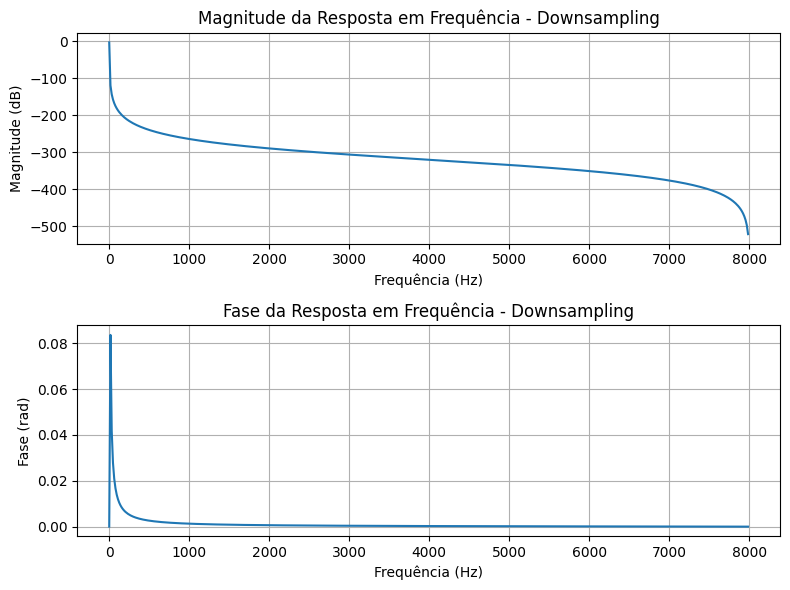

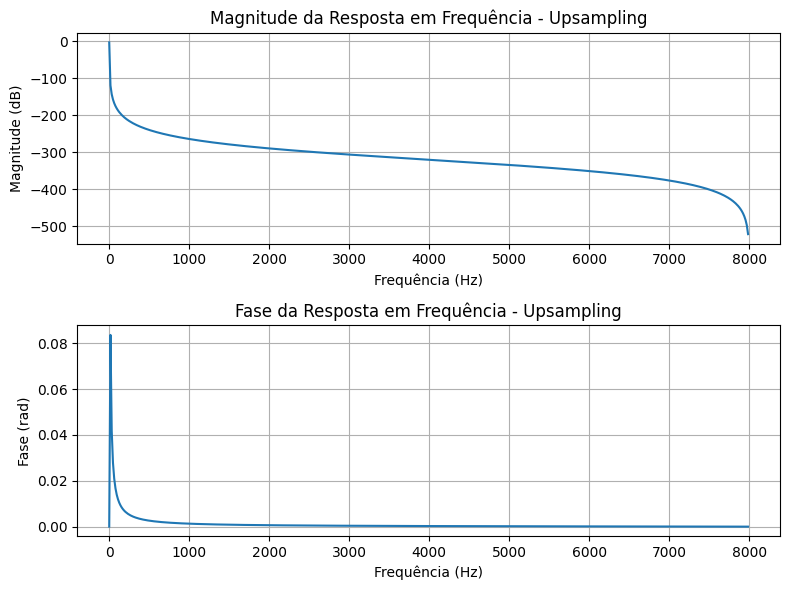

In [45]:
# (f) Resposta em frequência dos filtros de up e downsampling projetados
# Calcular a frequência de Nyquist
nyquist_freq = 0.5 * fs_original

# Calcular a resposta em frequência do filtro de downsampling
downsampling_filter = signal.butter(order, cutoff_freq/nyquist_freq, btype='low', analog=False, output='ba')
freq_downsampling, response_downsampling = signal.freqz(*downsampling_filter, fs=fs_original)

# Calcular a resposta em frequência do filtro de upsampling
upsampling_filter = signal.butter(order, cutoff_freq/nyquist_freq, btype='low', analog=False, output='ba')
freq_upsampling, response_upsampling = signal.freqz(*upsampling_filter, fs=fs_original)

# Calcular magnitude e fase da resposta em frequência dos filtros de downsampling e upsampling
magnitude_downsampling = 20 * np.log10(np.abs(response_downsampling))
phase_downsampling = np.angle(response_downsampling)
magnitude_upsampling = 20 * np.log10(np.abs(response_upsampling))
phase_upsampling = np.angle(response_upsampling)

# Plotar gráfico da magnitude e fase da resposta em frequência do filtro de downsampling
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_downsampling, magnitude_downsampling)
plt.title('Magnitude da Resposta em Frequência - Downsampling')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(freq_downsampling, phase_downsampling)
plt.title('Fase da Resposta em Frequência - Downsampling')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (rad)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotar gráfico da magnitude e fase da resposta em frequência do filtro de upsampling
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_upsampling, magnitude_upsampling)
plt.title('Magnitude da Resposta em Frequência - Upsampling')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(freq_upsampling, phase_upsampling)
plt.title('Fase da Resposta em Frequência - Upsampling')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (rad)')
plt.grid(True)

plt.tight_layout()
plt.show()

Especificações dos filtros:
Frequência de amostragem original: 16000.0 Hz
Frequência de amostragem desejada: 8000.0 Hz
Frequência de corte desejada: 4000.0 Hz
Ordem do filtro: 4
Aproximação usada: Butterworth
Justificativa: A aproximação Butterworth é uma escolha comum para filtros de áudio, pois apresenta uma resposta em frequência mais plana.


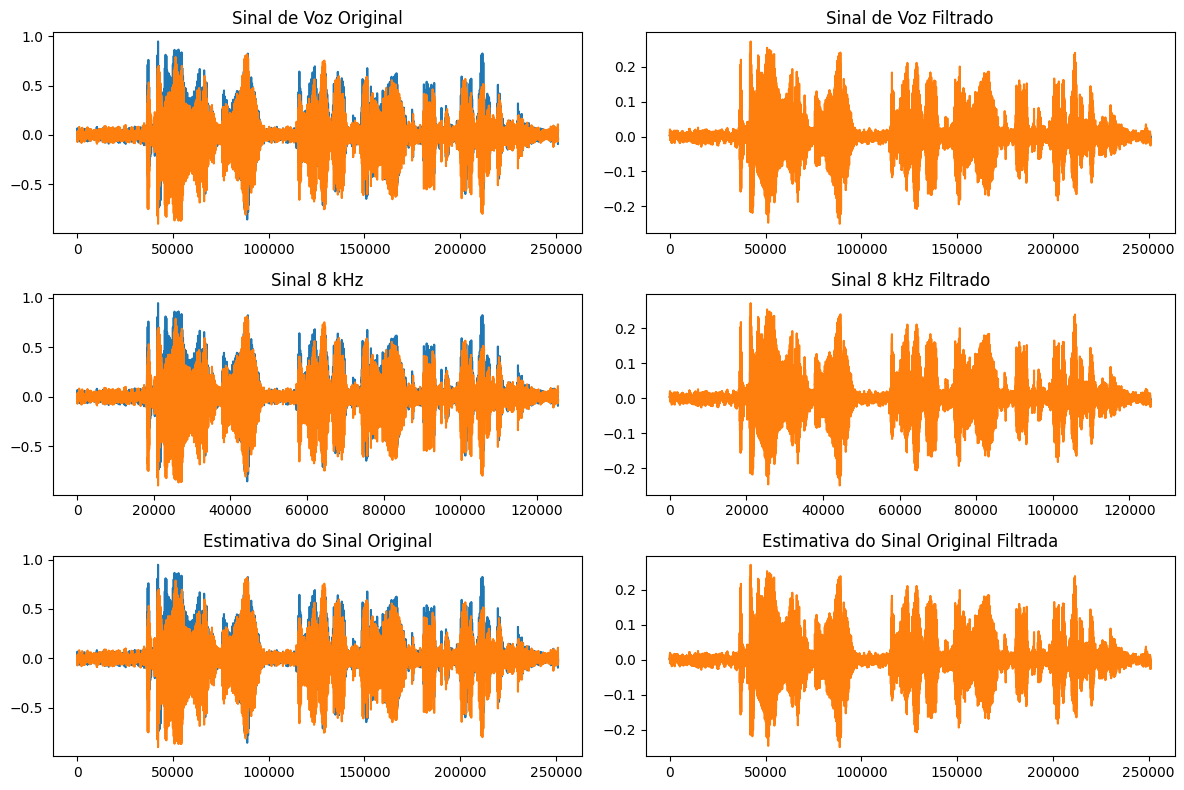

In [35]:
# (g) Especificações dos filtros
print("Especificações dos filtros:")
print("Frequência de amostragem original: {} Hz".format(fs_original))
print("Frequência de amostragem desejada: {} Hz".format(fs_target))
print("Frequência de corte desejada: {} Hz".format(cutoff_freq))
print("Ordem do filtro: {}".format(order))
print("Aproximação usada: Butterworth")
print("Justificativa: A aproximação Butterworth é uma escolha comum para filtros de áudio, pois apresenta uma resposta em frequência mais plana.")

# Filtrar os sinais de voz
filtered_voice_signal = signal.lfilter(downsampling_filter[0], downsampling_filter[1], voice_signal)
filtered_downsampled_signal = signal.lfilter(downsampling_filter[0], downsampling_filter[1], downsampled_signal)
filtered_upsampled_signal = signal.lfilter(upsampling_filter[0], upsampling_filter[1], upsampled_signal)

# Plotar os gráficos antes e depois da filtragem
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(voice_signal)
plt.title("Sinal de Voz Original")

plt.subplot(3, 2, 2)
plt.plot(filtered_voice_signal)
plt.title("Sinal de Voz Filtrado")

plt.subplot(3, 2, 3)
plt.plot(downsampled_signal)
plt.title("Sinal 8 kHz")

plt.subplot(3, 2, 4)
plt.plot(filtered_downsampled_signal)
plt.title("Sinal 8 kHz Filtrado")

plt.subplot(3, 2, 5)
plt.plot(upsampled_signal)
plt.title("Estimativa do Sinal Original")

plt.subplot(3, 2, 6)
plt.plot(filtered_upsampled_signal)
plt.title("Estimativa do Sinal Original Filtrada")

plt.tight_layout()
plt.show()

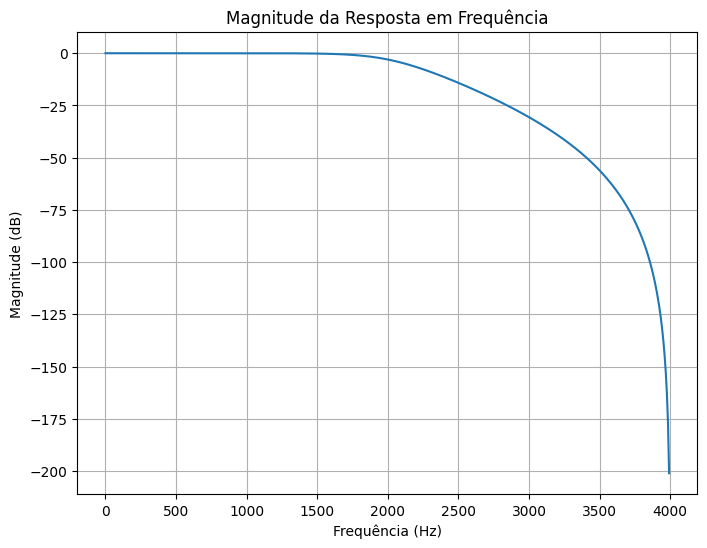

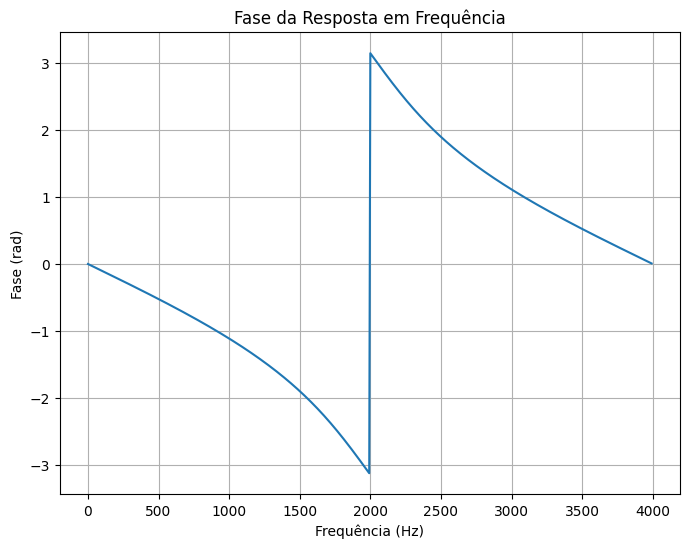

In [36]:
# Definir especificações do filtro para o sinal amostrado
fs = fs_target           # Frequência de amostragem (Hz)
cutoff_freq = 0.5  # Frequência de corte normalizada (0 < Wn < 1)
order = 4          # Ordem do filtro

# Calcular a resposta em frequência do filtro
b, a = signal.butter(order, cutoff_freq, btype='low', analog=False, output='ba')
freq, response = signal.freqz(b, a, fs=fs)

# Calcular magnitude e fase da resposta em frequência
magnitude = 20 * np.log10(np.abs(response))
phase = np.angle(response)

# Plotar gráfico da magnitude da resposta em frequência
plt.figure(figsize=(8, 6))
plt.plot(freq, magnitude)
plt.title('Magnitude da Resposta em Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

# Plotar gráfico da fase da resposta em frequência
plt.figure(figsize=(8, 6))
plt.plot(freq, phase)
plt.title('Fase da Resposta em Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (rad)')
plt.grid(True)
plt.show()